In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (16,7)
plt.style.use('fivethirtyeight')

import ipywidgets
from ipywidgets import interact, interact_manual

In [2]:
df = pd.read_csv('Dataset/startup_funding.csv')
df.columns = ['SNo', 'Date', 'StartupName', 'IndustryVertical',
       'SubVertical', 'City', 'InvestorsName', 'InvestmentType',
       'Amount', 'Remarks']

In [3]:
df

,SNo,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,Amount,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN
...,...,...,...,...,...,...,...,...,...,...
3039,3040,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"45,00,000",NaN
3040,3041,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"8,25,000",Govt backed VC Fund
3041,3042,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"15,00,000",NaN
3042,3043,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"


In [4]:
df.isna().sum()

SNo                    0
Date                   0
StartupName            0
IndustryVertical     171
SubVertical          936
City                 180
InvestorsName         24
InvestmentType         4
Amount               960
Remarks             2625
dtype: int64

In [5]:
df.isna().sum()/df.shape[0] * 100

SNo                  0.000000
Date                 0.000000
StartupName          0.000000
IndustryVertical     5.617608
SubVertical         30.749014
City                 5.913272
InvestorsName        0.788436
InvestmentType       0.131406
Amount              31.537451
Remarks             86.235217
dtype: float64

In [6]:
df.drop('Remarks',axis=1,inplace=True)
df

,SNo,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,Amount
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000"
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394"
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860"
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000"
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000"
...,...,...,...,...,...,...,...,...,...
3039,3040,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"45,00,000"
3040,3041,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"8,25,000"
3041,3042,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"15,00,000"
3042,3043,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN


In [7]:
sorted(list(df.StartupName.unique()))

['"BYJU\\\\\'S"',
 '#Fame',
 '121Policy',
 '19th mile',
 '1Crowd',
 '1mg',
 '1mg (Healthkartplus)',
 '20Dresses',
 '33Coupons',
 '360Ride',
 '3Dexter',
 '3HCare',
 '3rdFlix',
 '48East',
 '4tigo',
 '5th Vital',
 '6Degree',
 '75F',
 '91SpringBoard',
 '99Games',
 '99PerHour',
 '9Stacks',
 'A&R Bon Vivants',
 'ABI Health',
 'AEON Learning',
 'AHA Taxis',
 'AYE Finance',
 'AadharAPI.com',
 'Aadyah',
 'Aahaa',
 'Aahaa Stores',
 'Aarav UAV',
 'Aasaanjobs',
 'Aashiyaan',
 'Aavishkaar-Intellecap Group',
 'AbeRuk',
 'Abhibus',
 'Absentia',
 'Absentia VR',
 'Ace Turtle',
 'Ace2three',
 'Acko',
 'ActOnMagic',
 'Actionable Analytics',
 'Active AI',
 'Active.ai',
 'Actofit',
 'Ad2pro',
 'AdPushUp',
 'AdStringO',
 'AdUrCup',
 'AdWyze',
 'Address Health',
 'AdmitKard',
 'Advanced Structures India',
 'Advantage Club',
 'Advenio',
 'Adytude',
 'Aequm',
 'AerMed',
 'Affimity',
 'Affordplan',
 'Agara Labs',
 'AgentDesks',
 'Agricxlab',
 'Agrostar',
 'Agrowave',
 'AirCTO',
 'AirMed Labs',
 'AirZaar',
 'Air

In [8]:
df

,SNo,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,Amount
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000"
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394"
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860"
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000"
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000"
...,...,...,...,...,...,...,...,...,...
3039,3040,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"45,00,000"
3040,3041,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"8,25,000"
3041,3042,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"15,00,000"
3042,3043,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN


In [9]:
df.replace('nan',np.nan,inplace=True)
df

,SNo,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,Amount
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000"
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394"
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860"
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000"
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000"
...,...,...,...,...,...,...,...,...,...
3039,3040,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"45,00,000"
3040,3041,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"8,25,000"
3041,3042,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"15,00,000"
3042,3043,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN


In [10]:
df.isna().sum()

SNo                   0
Date                  0
StartupName           0
IndustryVertical    171
SubVertical         936
City                180
InvestorsName        24
InvestmentType        4
Amount              960
dtype: int64

In [11]:
sorted(list(df[~(df.IndustryVertical.isna())].IndustryVertical.unique()))

['360-degree view creating platform',
 '3D Printer Manufacturer',
 'AI',
 'API Workflow platform',
 'Accounting',
 'Activity Based Social Network',
 'Advertising & Marketing Community Networking platform',
 'Advertising, Marketing',
 'Aerospace',
 'Affordable Education',
 'Affordable Hotel Booking Online',
 'Agriculture',
 'Agtech',
 'Algorithmic Match Making Platform',
 'Alternate Mobile Monetization platform',
 'App Analytics platform',
 'App based Bus Pooling Services',
 'App based Fitness coaching',
 'App security\\\\xc2\\\\xa0 testing platform',
 'Architectural Design & Consulting',
 'Artificial Intelligence',
 'Artificial Intelligence Ecommerce Chatbot',
 'Artificial Intelligence platform',
 'Artist / Designer Marketplace',
 'Asset Financing platform',
 'Auto',
 'Auto Insurance Online platform',
 'Auto Rickshaw Based Services',
 'Auto Rickshaw based Logistics',
 'Automated Storage & Warehousing Solution',
 'Automation',
 'Automobile',
 'Automotive',
 'Automotive Services platform

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   SNo               3044 non-null   int64 
 1   Date              3044 non-null   object
 2   StartupName       3044 non-null   object
 3   IndustryVertical  2873 non-null   object
 4   SubVertical       2108 non-null   object
 5   City              2864 non-null   object
 6   InvestorsName     3020 non-null   object
 7   InvestmentType    3040 non-null   object
 8   Amount            2084 non-null   object
dtypes: int64(1), object(8)
memory usage: 214.2+ KB


In [13]:
df[~(df.IndustryVertical.isna())].IndustryVertical

0                           E-Tech
1                   Transportation
2                       E-commerce
3                          FinTech
4              Fashion and Apparel
                   ...            
2868    Startup Analytics platform
2869      Mobile Food Ordering app
2870    Financial Markets Software
2871     Hiring Analytics platform
2872     Online Travel Marketplace
Name: IndustryVertical, Length: 2873, dtype: object

In [14]:
def clean_string(x): return str(x).replace('\\xc2\\\\xa0','').replace('\\\\xc2\\\\xa0','')

In [15]:
for col in df.columns:
    df[col] = df[col].apply(lambda x: clean_string(x))

In [16]:
import unicodedata
import re

def clean_text(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('ascii')
    text = re.sub(r"[']", '', text)
    text = re.sub(r'\\', '', text)
    text = re.sub(r'"', '', text)
    text = re.sub(r'xe2x80x99',"'",text)
    
    return text

df['StartupName'] = df['StartupName'].apply(clean_text)

In [17]:
def normalize_startup_name(name):
    return name.lower().strip().replace("'", '').replace(".", '').replace(' ','').title()

df['StartupName'] = df['StartupName'].apply(normalize_startup_name)

In [18]:
# This is to check if there are any special characters in Columns

@interact
def check(start_with=['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z'],
          column = ['StartupName','IndustryVertical','SubVertical','City','InvestorsName','InvestmentType']):
    return sorted([x for x in list(df[column].unique()) if(str(x).lower().startswith(start_with))])

interactive(children=(Dropdown(description='start_with', options=('a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i',…

In [19]:
df.Amount

0       20,00,00,000
1          80,48,394
2        1,83,58,860
3          30,00,000
4          18,00,000
            ...     
3039       45,00,000
3040        8,25,000
3041       15,00,000
3042             nan
3043        1,40,000
Name: Amount, Length: 3044, dtype: object

In [20]:
#This is to check if there are any special characters in Columns
@interact
def check(start_with=[',','.','/',';',"'",'[',']','<','>','?',':','"','{','}','|','!','@','#','$','%','^','&','*','(',')','_','+','-','=','\\'],
          column = ['SNo','Date','StartupName','IndustryVertical','SubVertical','City','InvestorsName','InvestmentType','Amount']):
    return sorted([x for x in list(df[column].unique()) if(start_with in str(x).lower())])

interactive(children=(Dropdown(description='start_with', options=(',', '.', '/', ';', "'", '[', ']', '<', '>',…

In [21]:
def clean_amt(x):
    x = ''.join([c for c in str(x) if c in ['0','1','2','3','4','5','6','7','8','9']])
    if x == '':
        return '-999'
    return x

df.Amount = df.Amount.apply(lambda x: float(clean_amt(x)))

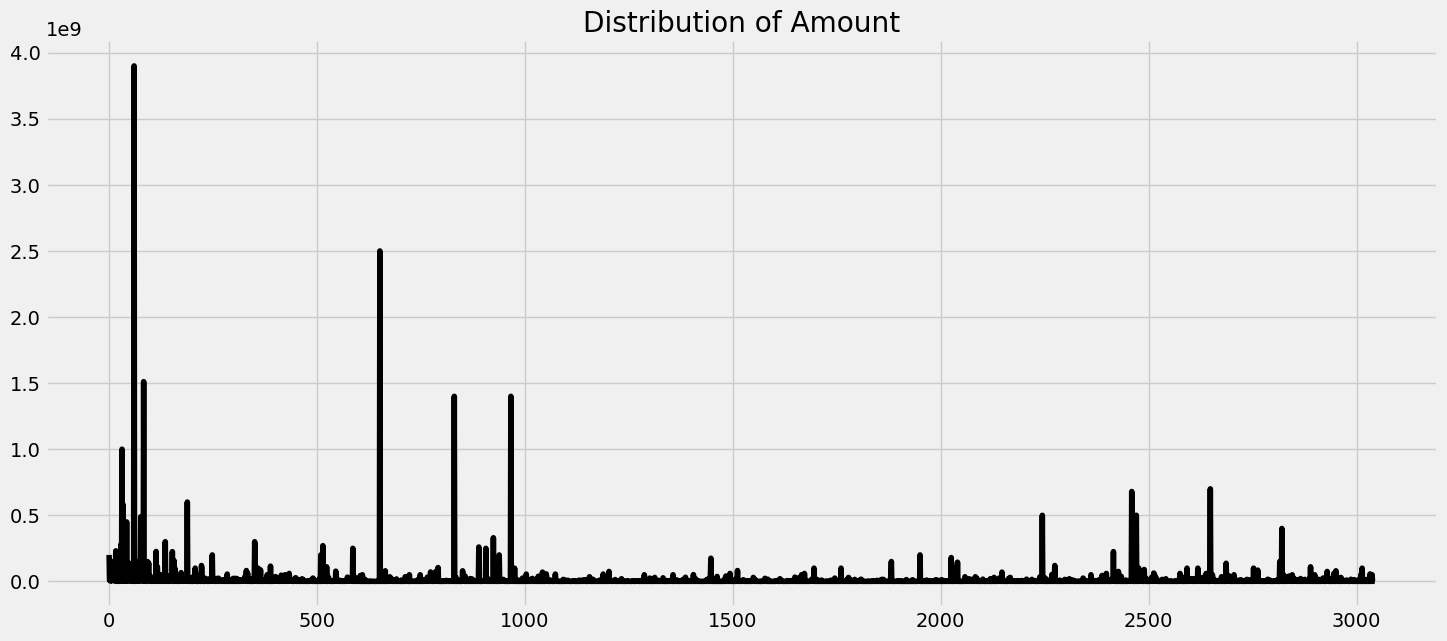

In [22]:
df.Amount.plot(kind='line',color='black')
plt.title('Distribution of Amount')
plt.show()

In [23]:
df.Date[['\\' in df.Date[x] for x in range(df.shape[0])]]

2606    \10/7/2015
Name: Date, dtype: object

In [24]:
[(df.Date[x].replace('.','/').replace('//','/').replace('05/072018','05/07/2018').replace('01/07/015','01/07/2015').replace('\\10/7/2015','10/07/2015'))  for x in range(df.shape[0])]

['09/01/2020',
 '13/01/2020',
 '09/01/2020',
 '02/01/2020',
 '02/01/2020',
 '13/01/2020',
 '10/01/2020',
 '12/12/2019',
 '06/12/2019',
 '03/12/2019',
 '13/12/2019',
 '17/12/2019',
 '16/12/2019',
 '16/12/2019',
 '14/12/2019',
 '11/12/2019',
 '20/12/2019',
 '13/11/2019',
 '14/11/2019',
 '13/11/2019',
 '17/11/2019',
 '18/11/2019',
 '15/11/2019',
 '20/11/2019',
 '12/11/2019',
 '20/11/2019',
 '11/11/2019',
 '19/11/2019',
 '18/11/2019',
 '15/11/2019',
 '19/11/2019',
 '25/11/2019',
 '04/10/2019',
 '02/10/2019',
 '21/10/2019',
 '05/09/2019',
 '04/09/2019',
 '04/09/2019',
 '04/09/2019',
 '04/09/2019',
 '04/09/2019',
 '04/09/2019',
 '04/09/2019',
 '03/09/2019',
 '01/08/2019',
 '01/08/2019',
 '01/08/2019',
 '01/08/2019',
 '01/08/2019',
 '12/08/2019',
 '13/08/2019',
 '13/08/2019',
 '23/08/2019',
 '23/08/2019',
 '23/08/2019',
 '22/08/2019',
 '21/08/2019',
 '23/08/2019',
 '19/08/2019',
 '19/08/2019',
 '27/08/2019',
 '02/07/2019',
 '02/07/2019',
 '01/07/2019',
 '03/07/2019',
 '01/07/2019',
 '04/07/20

In [25]:
df.Date = [df.Date[x].replace('.','/').replace('//','/').replace('05/072018','05/07/2018').replace('01/07/015',
                      '01/07/2015').replace('\\10/7/2015','10/07/2015')  for x in range(df.shape[0])]

In [26]:
df.Date = pd.to_datetime(df.Date,format='%d/%m/%Y')

In [27]:
df.Date

0      2020-01-09
1      2020-01-13
2      2020-01-09
3      2020-01-02
4      2020-01-02
          ...    
3039   2015-01-29
3040   2015-01-29
3041   2015-01-30
3042   2015-01-30
3043   2015-01-31
Name: Date, Length: 3044, dtype: datetime64[ns]

In [28]:
df.isna().sum()

SNo                 0
Date                0
StartupName         0
IndustryVertical    0
SubVertical         0
City                0
InvestorsName       0
InvestmentType      0
Amount              0
dtype: int64

In [29]:
df = df.replace('nan',np.nan)

In [30]:
from warnings import filterwarnings
filterwarnings('ignore')

In [31]:
temp = (df.Date.dt.year*100+df.Date.dt.month).value_counts().head(10)
yearmonth = (df.Date.dt.year*100+df.Date.dt.month).value_counts()

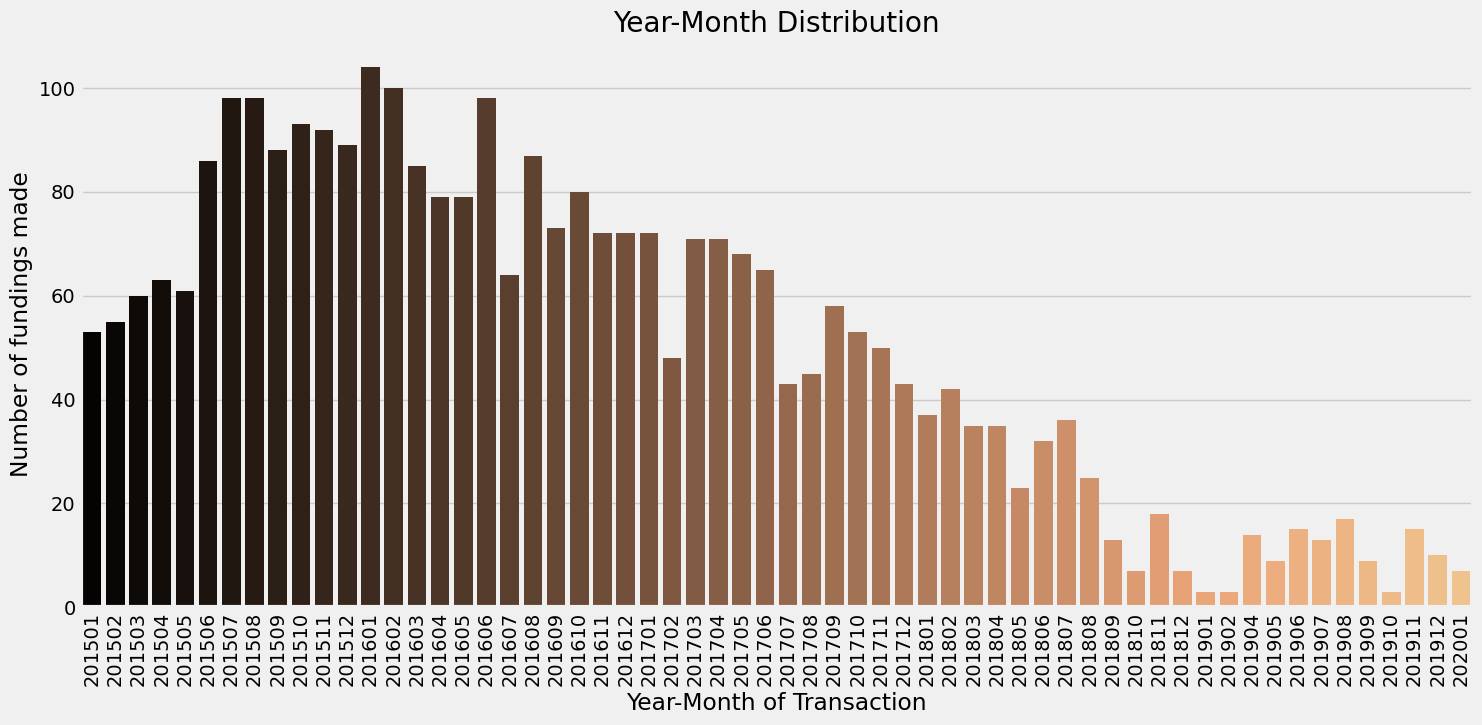

In [32]:
sns.barplot(x=yearmonth.index,y=yearmonth.values,palette='copper')
plt.xlabel('Year-Month of Transaction')
plt.ylabel('Number of fundings made')
plt.title('Year-Month Distribution')
plt.xticks(rotation=90)
plt.show()

In [33]:
print("Maximum funding to a Strtup is: ",df.Amount.max())

Maximum funding to a Strtup is:  3900000000.0


In [34]:
@interact
def checkmax(column='Amount',x=50000000):
    return df[df[column] > x].sort_values('Amount',ascending=False)

interactive(children=(Text(value='Amount', description='column'), IntSlider(value=50000000, description='x', m…

In [35]:
df[df.StartupName == 'Paytm']

,SNo,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,Amount
31,32,2019-11-25,Paytm,FinTech,Mobile Wallet,Noida,Vijay Shekhar Sharma,Funding Round,1.000000e+09
251,252,2018-06-26,Paytm,Technology,Digital Payment Platform,Noida,One 97 Communications,Private Equity,8.950000e+06
830,831,2017-05-18,Paytm,ECommerce,Mobile Wallet & ECommerce platform,Bangalore,SoftBank Group,Private Equity,1.400000e+09
1493,1494,2016-08-30,Paytm,eCommerce,Mobile Wallet & ECommerce platform,Bangalore,MediaTek Inc.,Private Equity,6.000000e+07
2459,2460,2015-09-29,Paytm,E-Commerce & M-Commerce platform,NaN,New Delhi,"Alibaba Group, Ant Financial",Private Equity,6.800000e+08
2890,2891,2015-03-13,Paytm,NaN,NaN,NaN,Ratan Tata,Private Equity,-9.990000e+02
2948,2949,2015-02-05,Paytm,NaN,NaN,NaN,Ant Financial Services (Alipay),Private Equity,-9.990000e+02


In [36]:
print('Minimum funding to a startup is: ',df.Amount.sort_values().min())

Minimum funding to a startup is:  -999.0


In [37]:
df[['Amount','StartupName']].sort_values('Amount').head(5)

,Amount,StartupName
2125,-999.0,Splitkart
1464,-999.0,Tacsecurity
708,-999.0,Fablestreet
709,-999.0,Monsoonfintech
710,-999.0,Monkeybox


In [38]:
df[df['Amount']== -999].shape

(971, 9)

In [39]:
print('On Average Indian StartUps got funding of ',df.Amount.dropna().sort_values().mean())

On Average Indian StartUps got funding of  13270058.261169514


In [40]:
print("Total StartUps funded: ",len(df.StartupName.unique()))

Total StartUps funded:  2280


In [41]:
df.StartupName.value_counts().head(10)

StartupName
Olacabs        9
Ayefinance     8
Oyorooms       8
Swiggy         8
Paytm          7
Byjus          7
Lendingkart    7
Holachef       6
Lenskart       6
Blackbuck      6
Name: count, dtype: int64

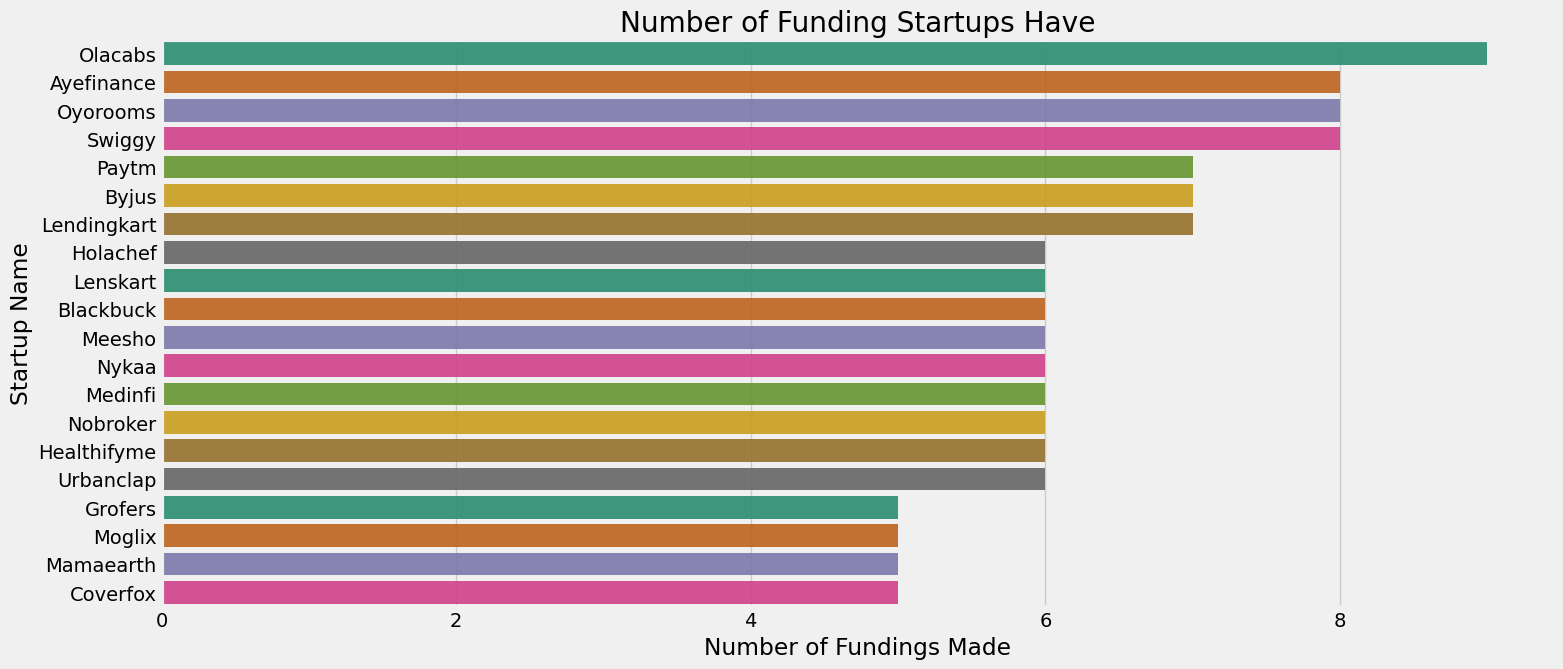

In [42]:
startupname = df.StartupName.value_counts().head(20)
sns.barplot(y= startupname.index,x=startupname.values, alpha=0.9,palette='Dark2')
plt.xlabel('Number of Fundings Made')
plt.ylabel('Startup Name')
plt.title('Number of Funding Startups Have')
plt.show()

In [43]:
df.isna().sum()

SNo                   0
Date                  0
StartupName           0
IndustryVertical    171
SubVertical         936
City                180
InvestorsName        24
InvestmentType        4
Amount                0
dtype: int64

In [44]:
df[df.IndustryVertical == 'Consumer Internet']

,SNo,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,Amount
151,152,2018-09-01,Netmeds,Consumer Internet,Online Pharmacy Chain,Chennai,"Sistema Asia Fund, Sistema JSFC and Tanncam In...",Private Equity,35000000.0
153,154,2018-09-03,Dailyhunt,Consumer Internet,News and ebooks Mobile App\,Bengaluru,Falcon Edge,Private Equity,6390000.0
155,156,2018-09-04,Happygoeasy,Consumer Internet,Online Travel Agecy,Gurugram,"Korea Investment Partners (KIP), Samsung and C...",Private Equity,-999.0
156,157,2018-09-05,Nykaa,Consumer Internet,Online Marketplace For Multi-brand Beauty Cosm...,Mumbai,Lighthouse,Private Equity,157200000.0
158,159,2018-09-06,Dream11,Consumer Internet,Online Gaming Platform,Mumbai,"Tencent, Kalaari Capital and Private equity fi...",Private Equity,100000000.0
...,...,...,...,...,...,...,...,...,...
2100,2101,2016-01-29,Aisle,Consumer Internet,Indians focused Matchmaking App,Bangalore,"TermSheet, ah! Ventures",Seed Funding,185000.0
2101,2102,2016-01-29,Freshmenu,Consumer Internet,Fresh Food Delivery platform,Bangalore,"Zodius Technology Fund, Lightspeed Venture Par...",Private Equity,17000000.0
2104,2105,2016-01-29,Tinmen,Consumer Internet,Food Delivery Platform,Hyderabad,Lead Angel Network,Seed Funding,-999.0
2106,2107,2016-01-30,Findurclass,Consumer Internet,Hobby & Activity Class Aggregator,Mumbai,"Amit Patni, Anirudh Damani, Samir Shah",Seed Funding,-999.0


In [45]:
df.IndustryVertical = df.IndustryVertical.replace(np.nan,'Consumer Technology')

In [46]:
industry = df.IndustryVertical.value_counts().head(10)
industry

IndustryVertical
Consumer Internet      941
Technology             478
eCommerce              186
Consumer Technology    172
Healthcare              70
Finance                 62
ECommerce               61
Logistics               32
E-Commerce              29
Education               24
Name: count, dtype: int64

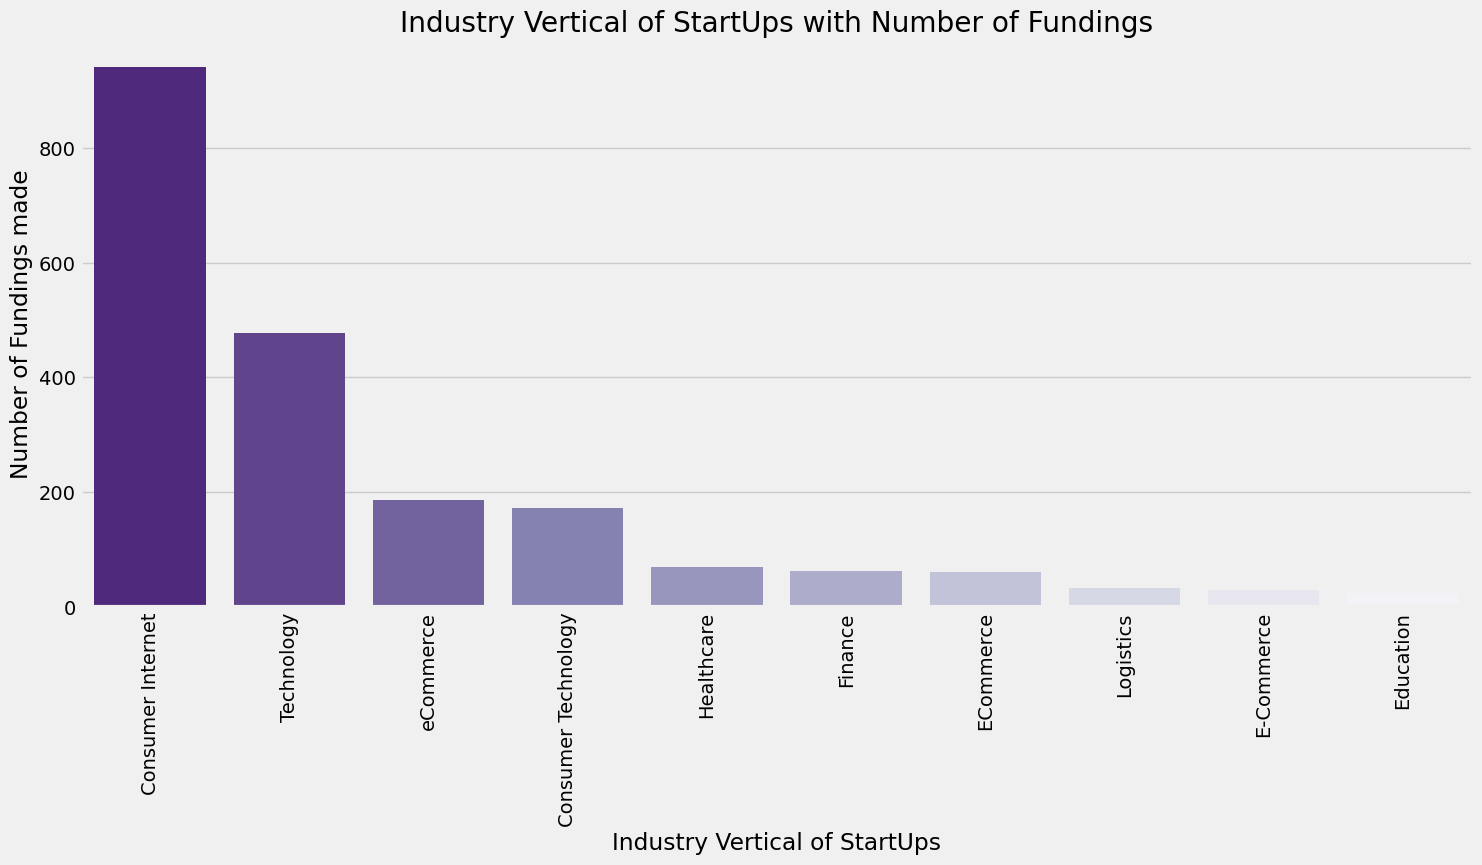

In [47]:
sns.barplot(y= industry.values,x=industry.index, palette='Purples_r')
plt.xlabel('Industry Vertical of StartUps')
plt.ylabel('Number of Fundings made')
plt.title('Industry Vertical of StartUps with Number of Fundings')
plt.xticks(rotation=90)
plt.show()

In [48]:
subvert = df.SubVertical.value_counts().head(20)
subvert

SubVertical
Online Lending Platform                          11
Online Pharmacy                                  10
Food Delivery Platform                            8
Online Education Platform                         5
Education                                         5
Online lending platform                           5
Online Learning Platform                          5
Online Lending                                    5
Non-Banking Financial Company                     4
Online Food Delivery                              4
B2B Marketplace                                   3
Online Insurance Platform                         3
Agri-tech                                         3
SaaS                                              3
Online Insurance Aggregator                       3
Online platform for Higher Education Services     3
ECommerce Marketplace                             3
Online Gifting platform                           3
Online Marketplace                                3


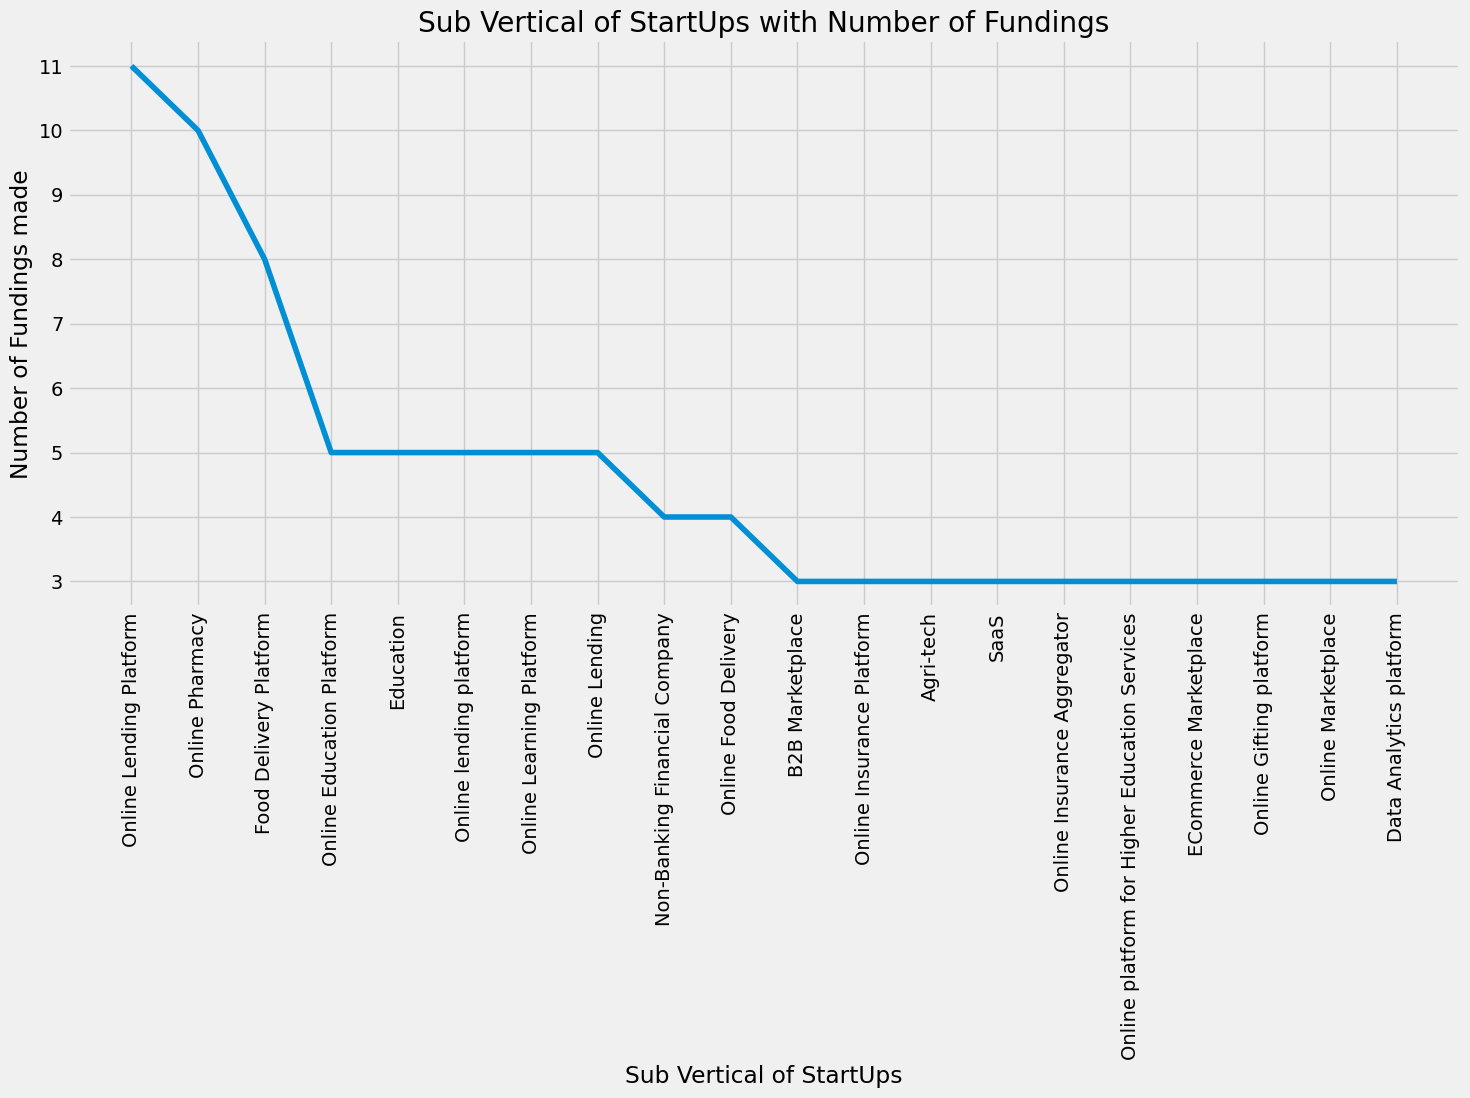

In [49]:
sns.lineplot(y= subvert.values,x=subvert.index)
plt.xlabel('Sub Vertical of StartUps')
plt.ylabel('Number of Fundings made')
plt.title('Sub Vertical of StartUps with Number of Fundings')
plt.xticks(rotation=90)
plt.show()

In [50]:
df.City.unique()

array(['Bengaluru', 'Gurgaon', 'New Delhi', 'Mumbai', 'Chennai', 'Pune',
       'Noida', 'Faridabad', 'San Francisco', 'San Jose,', 'Amritsar',
       'Delhi', 'Kormangala', 'Tulangan', 'Hyderabad', 'Burnsville',
       'Menlo Park', 'Gurugram', 'Palo Alto', 'Santa Monica', 'Singapore',
       'Taramani', 'Andheri', 'Chembur', 'Nairobi', 'Haryana', 'New York',
       'Karnataka', 'Mumbai/Bengaluru', 'Bhopal',
       'Bengaluru and Gurugram', 'India/Singapore', 'Jaipur', 'India/US',
       'Nagpur', 'Indore', 'New York, Bengaluru', 'California', 'India',
       'Ahemadabad', 'Rourkela', 'Srinagar', 'Bhubneswar', 'Chandigarh',
       'Delhi & Cambridge', 'Kolkatta', 'Kolkata', 'Coimbatore',
       'Bangalore', 'Udaipur', nan, 'Ahemdabad', 'Bhubaneswar',
       'Ahmedabad', 'Surat', 'Goa', 'Uttar Pradesh', 'Nw Delhi', 'Gaya',
       'Vadodara', 'Trivandrum', 'Missourie', 'Panaji', 'Gwalior',
       'Karur', 'Udupi', 'Kochi', 'Agra', 'Bangalore/ Bangkok', 'Hubli',
       'Kerala', 'Kozhiko

In [51]:
df.City = df.City.replace(np.nan,'nan').replace('\\','')

In [52]:
df[~df.City.isna()]

,SNo,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,Amount
0,1,2020-01-09,Byjus,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000.0
1,2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394.0
2,3,2020-01-09,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860.0
3,4,2020-01-02,Https://Wwwwealthbucketin/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000.0
4,5,2020-01-02,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000.0
...,...,...,...,...,...,...,...,...,...
3039,3040,2015-01-29,Printvenue,Consumer Technology,NaN,nan,Asia Pacific Internet Group,Private Equity,4500000.0
3040,3041,2015-01-29,Graphene,Consumer Technology,NaN,nan,KARSEMVEN Fund,Private Equity,825000.0
3041,3042,2015-01-30,Madstreetden,Consumer Technology,NaN,nan,"Exfinity Fund, GrowX Ventures.",Private Equity,1500000.0
3042,3043,2015-01-30,Simplotel,Consumer Technology,NaN,nan,MakeMyTrip,Private Equity,-999.0


In [53]:
df.City = df.City.replace(('Bengaluru','nan'),('Bangalore','Bangalore'))
cities = df.City.value_counts().head(10)
cities

City
Bangalore    1021
Mumbai        567
New Delhi     421
Gurgaon       287
Pune          105
Hyderabad      99
Chennai        97
Noida          92
Gurugram       50
Ahmedabad      38
Name: count, dtype: int64

Text(0.5, 1.0, 'City Location of StartUps with Number of Fundings')

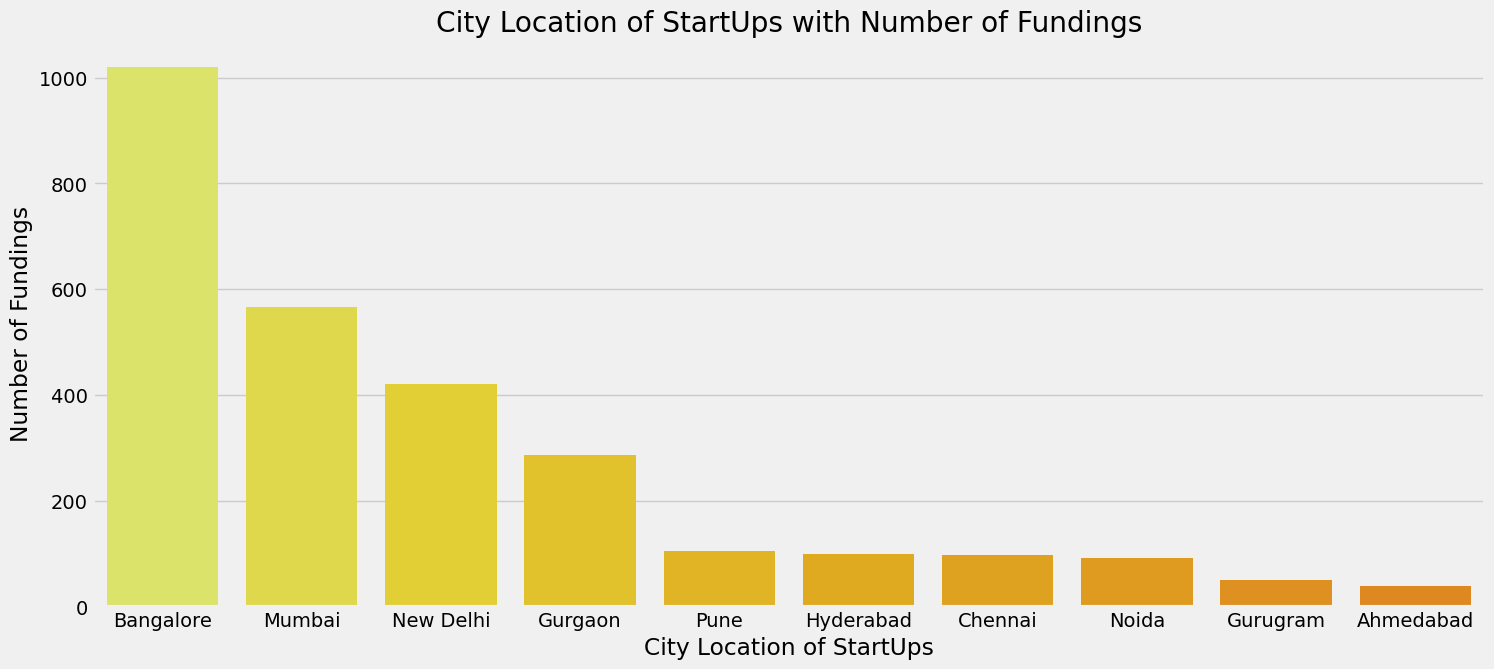

In [54]:
sns.barplot(x=cities.index,y=cities.values,palette='Wistia')
plt.xlabel('City Location of StartUps')
plt.ylabel('Number of Fundings')
plt.title('City Location of StartUps with Number of Fundings')

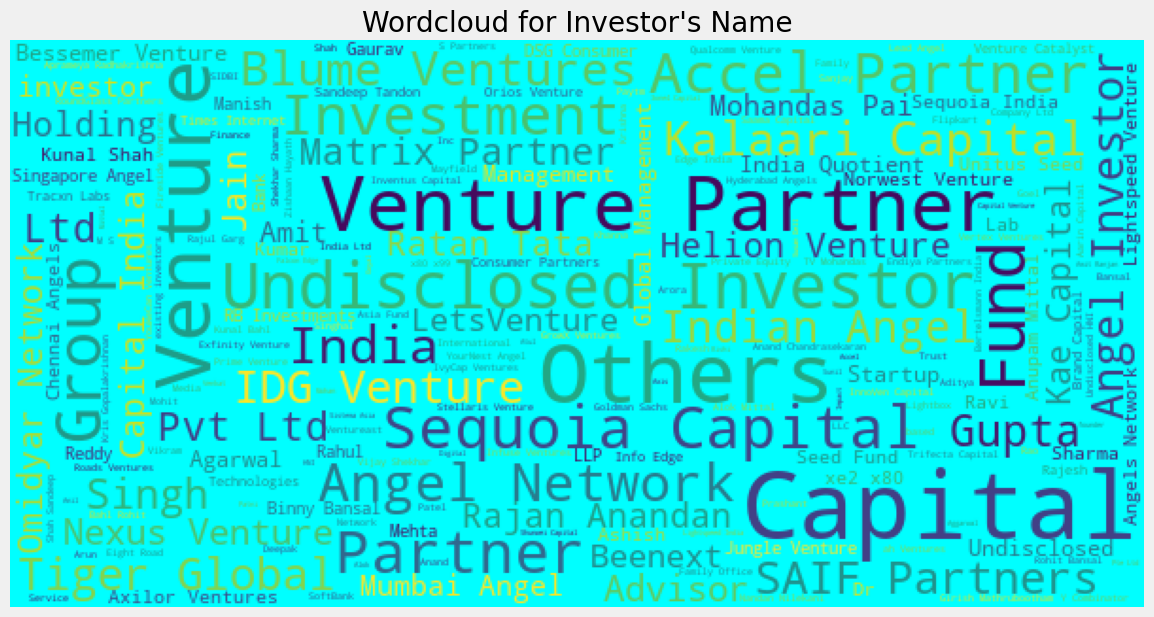

In [55]:
from wordcloud import WordCloud

names = df[~df.InvestorsName.isna()].InvestorsName
wordcloud = WordCloud(max_font_size=50,width=600,height=300, background_color='cyan').generate(" ".join(names))
plt.imshow(wordcloud)
plt.title("Wordcloud for Investor's Name")
plt.axis('off')
plt.show()

In [56]:
df = df.replace(('Undisclosed', 'undisclosed', 'unknown',np.nan,'\\N/A','Undisclosed investors','undisclosed investors',
                 'undisclosed Investors','Undisclosed Investor'),
                ('Undisclosed Investors','Undisclosed Investors','Undisclosed Investors','Undisclosed Investors',
                 'Undisclosed Investors','Undisclosed Investors','Undisclosed Investors','Undisclosed Investors',
                 'Undisclosed Investors'))


In [57]:
investors = df.InvestorsName.value_counts().head(10)
investors

InvestorsName
Undisclosed Investors       127
Ratan Tata                   25
Indian Angel Network         23
Kalaari Capital              16
Group of Angel Investors     15
Sequoia Capital              15
Accel Partners               12
Brand Capital                11
Venture Catalysts            11
SAIF Partners                10
Name: count, dtype: int64

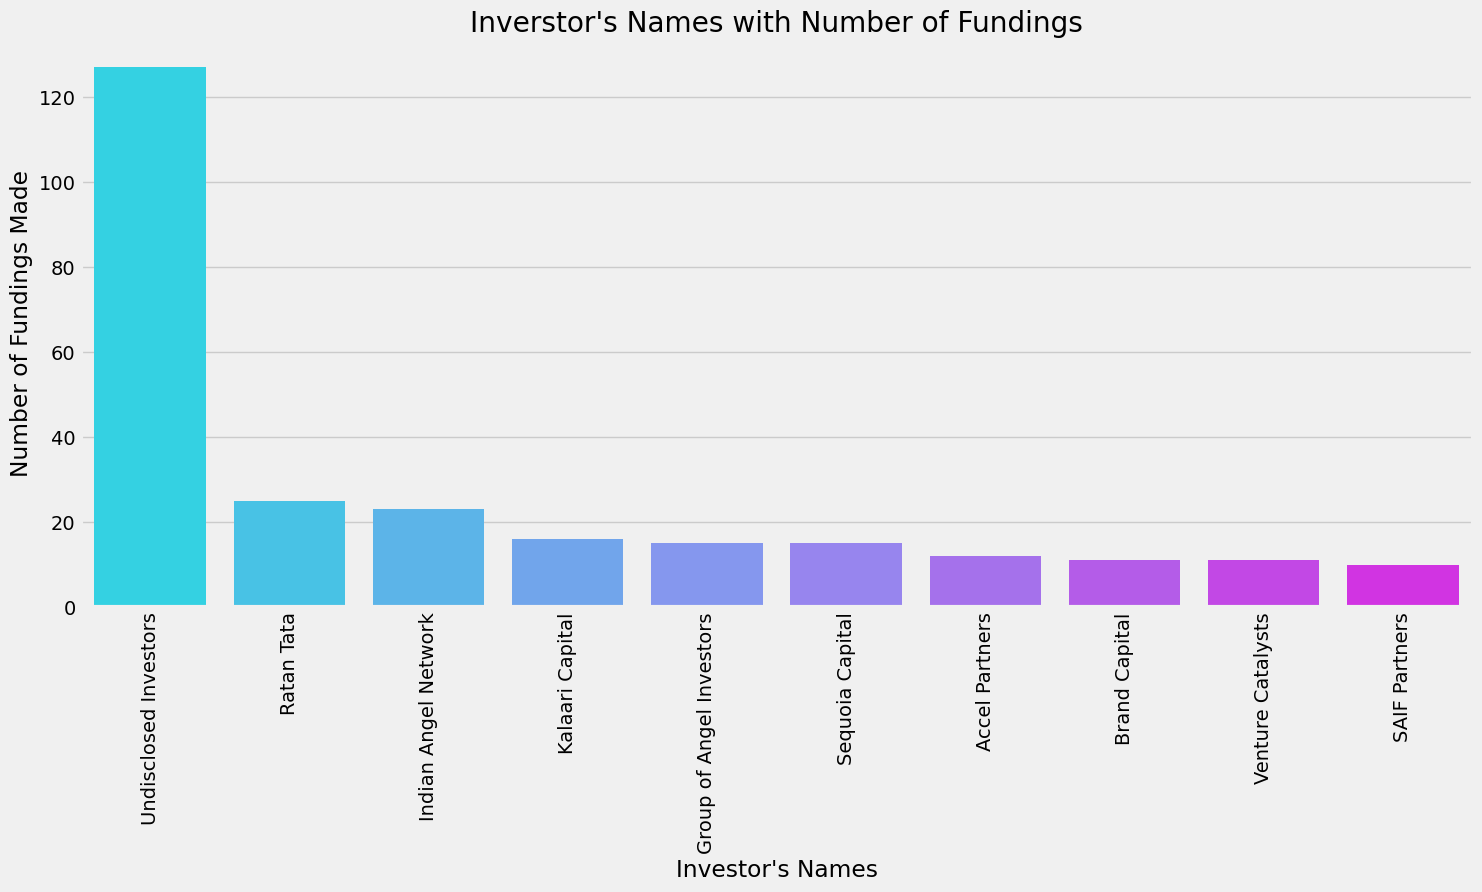

In [58]:
sns.barplot(x=investors.index,y=investors.values,palette='cool')
plt.xlabel('Investor\'s Names')
plt.ylabel('Number of Fundings Made')
plt.title('Inverstor\'s Names with Number of Fundings')
plt.xticks(rotation=90)
plt.show()

In [59]:
df.InvestmentType.unique()

array(['Private Equity Round', 'Series C', 'Series B', 'Pre-series A',
       'Seed Round', 'Series A', 'Series D', 'Seed', 'Series F',
       'Series E', 'Debt Funding', 'Series G', 'Series H', 'Venture',
       'Seed Funding', 'Undisclosed Investors', 'Funding Round',
       'Corporate Round', 'Maiden Round', 'pre-series A',
       'Seed Funding Round', 'Single Venture', 'Venture Round',
       'Pre-Series A', 'Angel', 'Series J', 'Angel Round', 'pre-Series A',
       'Venture - Series Unknown', 'Bridge Round', 'Private Equity',
       'Debt and Preference capital', 'Inhouse Funding',
       'Seed/ Angel Funding', 'Debt', 'Pre Series A', 'Equity',
       'Debt-Funding', 'Mezzanine', 'Series B (Extension)',
       'Equity Based Funding', 'Private Funding', 'Seed / Angel Funding',
       'Seed/Angel Funding', 'Seed funding', 'Seed / Angle Funding',
       'Angel / Seed Funding', 'Private', 'Structured Debt', 'Term Loan',
       'PrivateEquity', 'Angel Funding', 'Seed\\\\nFunding',
    

In [60]:
df.replace(('Seed / Angel Funding','Seed/Angel Funding', 'Seed funding', 'Seed / Angle Funding', 'Angel / Seed Funding',
           'Angel Funding', 'Seed/ Angel Funding', 'Seed\\\\nFunding', 'Private\\\\nEquity', 'Crowd funding', 'Crowd Funding'),
           ('Seed Angel Funding', 'Seed Angel Funding', 'Seed Angel Funding', 'Seed Angel Funding', 'Seed Angel Funding',
           'Seed Angel Funding','Seed Angel Funding', 'Seed Angel Funding', 'Private Equity', 'Crowd Funding', 
           'Crowd Funding'),
           inplace=True)
df.replace(('Seed', 'Seed Round', 'Seed Funding Round', 'Seed Angel Funding', 'Angel', 'Angel Round', 'Series B', 
            'Series B (Extension)', 'Venture', 'Single Venture', 'Venture Round', 'Venture - Series Unknown', 'Private Equity', 
            'Private Equity Round', 'PrivateEquity', 'Private', 'Private Funding', 'Debt Funding', 'Debt', 'Debt-Funding', 
            'Structured Debt', 'Term Loan', 'Debt and Preference capital'),
           ('Seed Funding', 'Seed Funding', 'Seed Funding', 'Seed Funding', 'Angel Funding', 'Angel Funding', 'Series B', 
            'Series B', 'Venture Funding', 'Venture Funding', 'Venture Funding', 'Venture Funding', 'Private Equity', 
            'Private Equity', 'Private Equity', 'Private Equity', 'Private Equity', 'Debt Funding', 'Debt Funding', 
            'Debt Funding', 'Debt Funding', 'Debt Funding', 'Debt Funding'),
           inplace=True)
df.replace(('Pre-series A', 'pre-series A', 'Pre-Series A', 'Pre Series A', 'pre-Series A'),
           ('Pre-Seed Funding', 'Pre-Seed Funding', 'Pre-Seed Funding', 'Pre-Seed Funding', 'Pre-Seed Funding'),
           inplace=True)

In [61]:
investment = df.InvestmentType.value_counts().head(10)
investment

InvestmentType
Seed Funding             1540
Private Equity           1364
Debt Funding               30
Series A                   24
Series B                   21
Series C                   14
Series D                   12
Pre-Seed Funding            9
Venture Funding             5
Undisclosed Investors       4
Name: count, dtype: int64

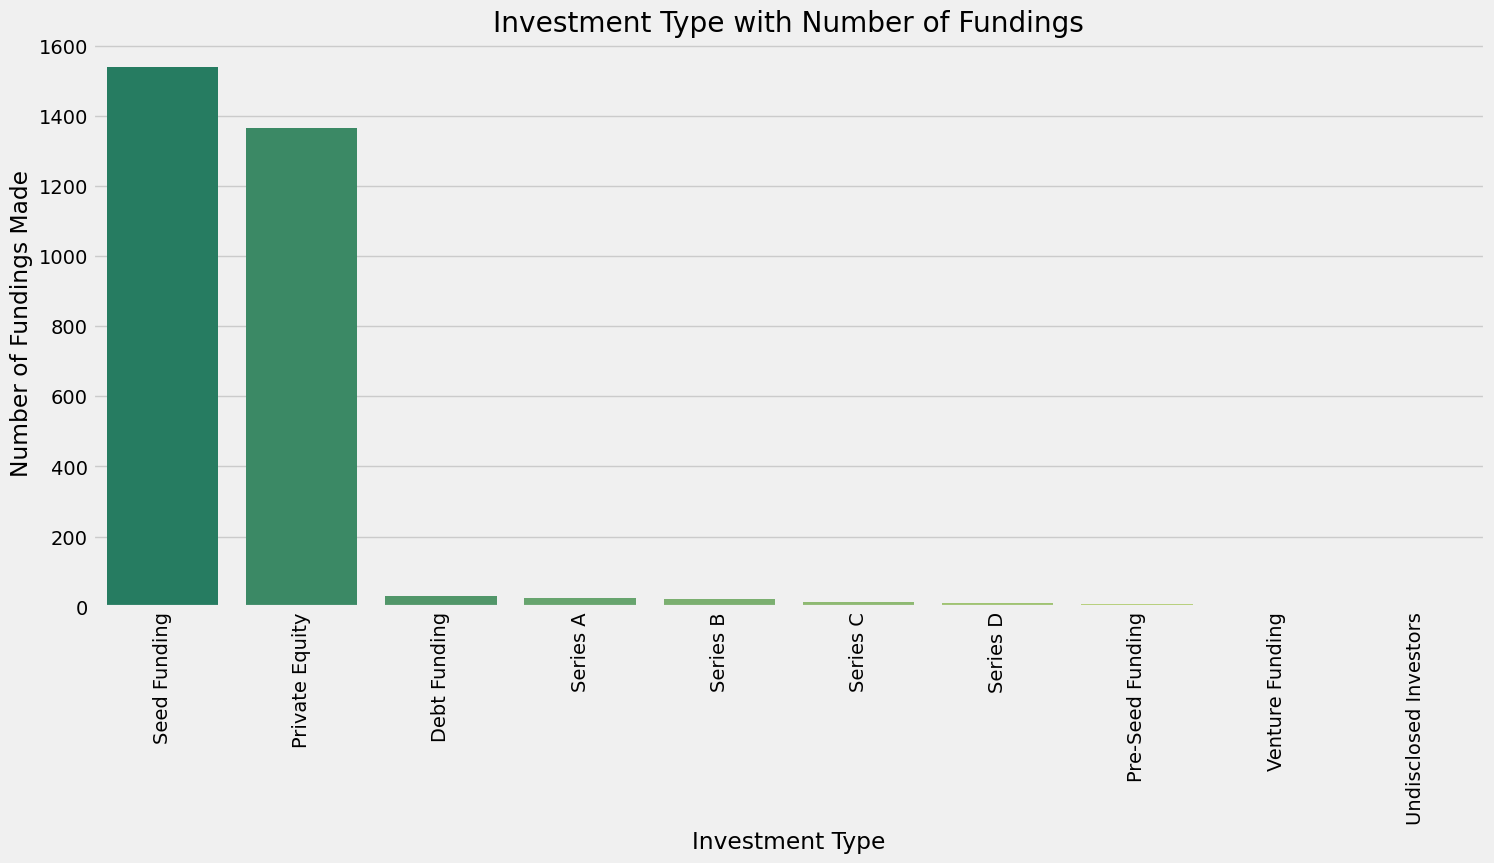

In [62]:
sns.barplot(x=investment.index,y=investment.values,palette='summer')
plt.xlabel('Investment Type')
plt.ylabel('Number of Fundings Made')
plt.title('Investment Type with Number of Fundings')
plt.xticks(rotation=90)
plt.show()